# INTRO TO MACHINE LEARNING 

In [14]:
# SET UP ENV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

## Supervised Learning 
### Linear Regression

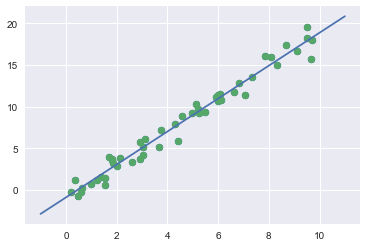

In [31]:
# STEP BY STEP BUILDING SciKit model:

# 0) DATA
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

# 1) Choose a class f model. 
# At the start we imported: "from sklearn.regression import LinearRegression"

# 2) Choose appropriate model 
model = LinearRegression(fit_intercept=True)

# 3) Arrange data into features matrix and target vector
X = x[:, np.newaxis]

# 4) Fit the model to your data
model.fit(X, y)

# 5) predict labels for unknown data
xfit = np.linspace(-1, 11)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)


#Show results on chart
plt.scatter(x, y)
plt.plot(xfit, yfit)


## Supervised Learning
### Gaussian Classification

0.9736842105263158

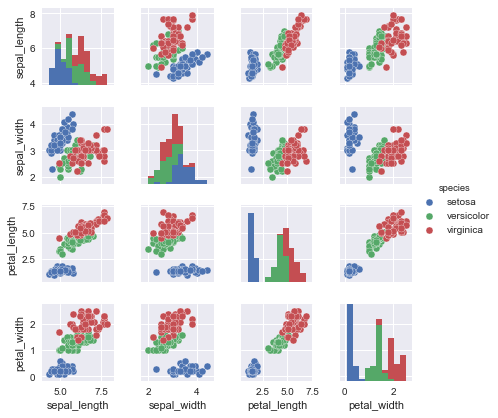

In [37]:
# IRIS EXAMPLE
# 1) import data
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=1.5)
# features X matrix
X_iris = iris.drop('species', axis=1)
# target Y array
y_iris = iris['species']

# SPLIT DATA to create a model
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

# MODEL THIS DATA
from sklearn.naive_bayes import GaussianNB          # 1) choose a model class
model = GaussianNB()                                # 2) Instantiate model class
model.fit(X_train, y_train)                         # 3) Fit the model to your data
y_model = model.predict(X_test)                     # 4) Predict Y values

# Show results
pd.DataFrame({'Y_predicted': y_model, 'Y_Real': y_test, 'Comparison': y_model==y_test})

# Test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

## Unsupervised Learning 
### Principal Component Analysis


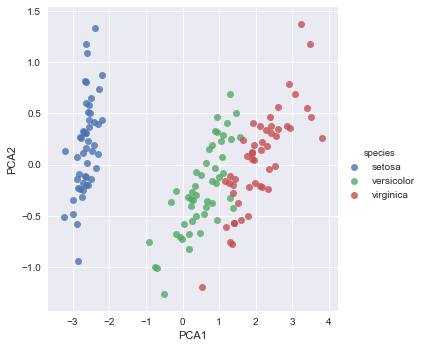

In [42]:
# 1) Choose appropriate model
from sklearn.decomposition import PCA
# 2) Instatiate model with hyperparameters
model = PCA(n_components=2)

# 3) Fit the data
model.fit(X_iris)

# 4) Transform the data into 2 dimensions 
X_2D = model.transform(X_iris)

# Let's see the result of transform
X_2D
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# let's plot the results
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', fit_reg=False)

## Unsupervised Learning
### Clustering


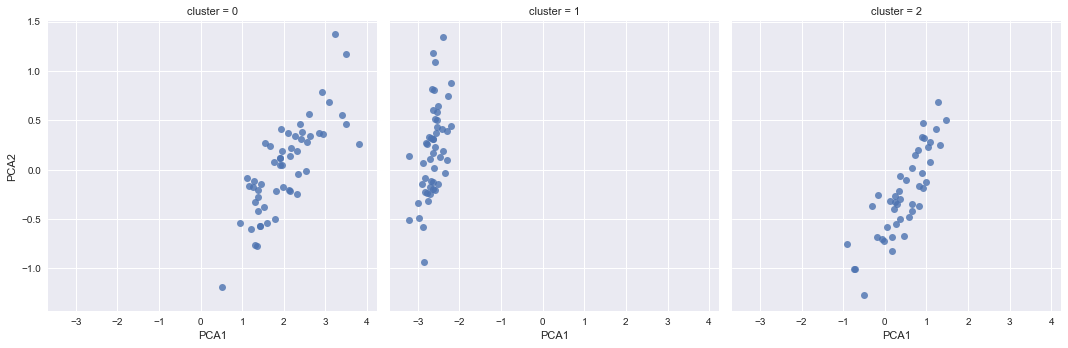

In [49]:
# 1) Choose a model class
from sklearn.mixture import GaussianMixture
# 2) Instantiate the model w/ hyperparameters
model = GaussianMixture(n_components=3, covariance_type='full')
# 3) Fir the model to the data
model.fit(X_iris)
# 4) Determine clusters labels
y_gmm = model.predict(X_iris)

# Show the clusters on graph
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, col='cluster', fit_reg=False)

## Application Exploring Handwritten Digits


### Loading and visualizing data

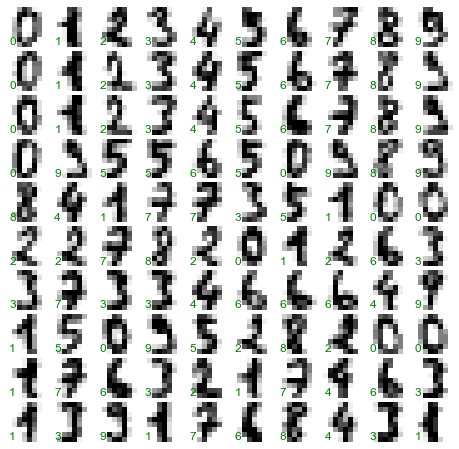

In [64]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

# Import libraries 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), 
            transform=ax.transAxes, color='green')

X = digits.data

y = digits.target

### Unsupervised learning: Dimensionality reduction

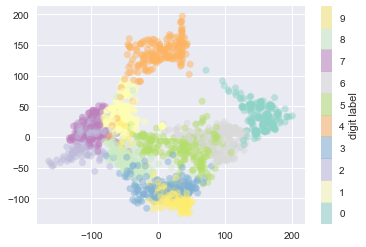

In [68]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
#Visualize
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y,
            edgecolors='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set3', 10))
plt.colorbar(label='digit label', ticks=range(100))
plt.clim(-0.5, 9.5)

### Unsupervised learning: Clustering

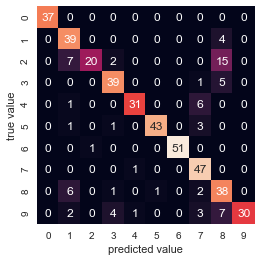

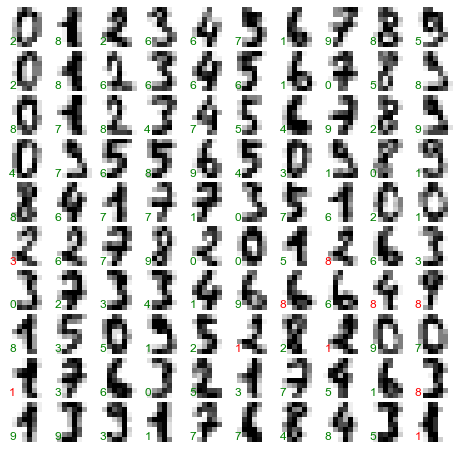

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

accuracy_score(ytest, y_model)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

# Visualize numbers with false labels in red
fix, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red')